### Travel.com

"Travel.com" company wants to enable and establish a viable business model to expand its customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, the company is offering 5 types of packages - Basic, Standard, Deluxe, Super Deluxe, and King. Looking at the last year's data, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

### Dataset

The dataset used for this project contains the following variables:

Travel.csv dataset (4888)

https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction

CustomerID: Unique customer ID
ProdTaken: Taken product: 1/0 (Target)
Age: The age of the customer
TypeofContact: How the customer was contacted (Company invited or Self Inquiry)
CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e.
DurationOfPitch: Duration of the pitch by a salesperson to the customer. (minute)
Occupation: Occupation of the customer.
Gender: Gender of the customer.
NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer.
NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch.
ProductPitched: Product pitched by the salesperson.
PreferredPropertyStar: Preferred hotel property rating by customer.
MaritalStatus: Marital status of the customer.
NumberOfTrips: Average number of trips in a year by customer.
Passport: The customer has a passport or not (0: No, 1: Yes).
PitchSatisfactionScore: Sales pitch satisfaction score.
OwnCar: Whether the customers own a car or not (0: No, 1: Yes).
NumberOfChildrenVisiting: Total number of children age less than 5 planning to take the trip with the customer.
Designation: Designation of the customer in the current organization.
MonthlyIncome: Gross monthly income of the customer.

### Model Building
The Random Forest model employed in this project utilizes random split hyperparameters, which create an ensemble of decision trees trained on diverse subsets of the training data.

Evaluation of the model's performance is done using key metrics such as AUC-ROC, a widely-used measure that assesses the classifier's ability to distinguish between classes. The confusion matrix provides a comprehensive breakdown of the model's predictions, enabling a detailed analysis of true positives, true negatives, false positives, and false negatives. Classification reports offer a concise summary of precision, recall, F1 score, and support for each class.

Additionally, the model provides insights into feature importance, facilitating feature selection, and understanding of the factors driving predictions. For further analysis, a single decision tree can be visualized to comprehend the underlying decision-making process.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
from plotly import express as px
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("../31 Random Forest ML/Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df["Gender"].replace("Fe Male", "Female",inplace=True)
df["MaritalStatus"].replace("Single", "Unmarried",inplace=True)


In [4]:



## Replace 'Age' with Median value
df['Age'].fillna(df['Age'].median(),inplace=True)

## Replace 'TypeofContact' with Mode value
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0],inplace=True)

## Replace 'DurationOfPitch' with Median value
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(),inplace=True)

## Replace 'NumberOfFollowups' with Mode value
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0],inplace=True)

## Replace 'PreferredPropertyStar' with Mode value
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0],inplace=True)

## Replace 'NumberOfTrips' with Median value
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(),inplace=True)

## Replace 'NumberOfChildrenVisiting' with Mode value
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0],inplace=True)

## Replace 'MonthlyIncome' with Median value
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)

# 


In [5]:
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],axis=1,inplace=True)

In [6]:
df.drop("CustomerID",inplace=True,axis=1)

In [7]:
X=df.drop("ProdTaken",axis=1)
y=df["ProdTaken"]

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

ohEncoder = OneHotEncoder(drop='first')
standardScaler=StandardScaler()

numeric_feats=X.select_dtypes(exclude='object').columns
categry_feats=X.select_dtypes(include='object').columns

columnTransformer = ColumnTransformer(
    [
        ('OneHotEncoder',ohEncoder,categry_feats),
        ('StandardScalar',standardScaler,numeric_feats)
    ]
)

In [11]:
X_train = columnTransformer.fit_transform(X_train)

In [12]:
X_test=columnTransformer.transform(X_test)

In [13]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 8.5 MB/s eta 0:00:18
   - -------------------------------------- 5.8/150.0 MB 23.5 MB/s eta 0:00:07
   --- ------------------------------------ 13.9/150.0 MB 31.2 MB/s eta 0:00:05
   ----- ---------------------------------- 20.2/150.0 MB 30.4 MB/s eta 0:00:05
   ------- -------------------------------- 28.8/150.0 MB 32.7 MB/s eta 0:00:04
   -------- ------------------------------- 32.2/150.0 MB 29.3 MB/s eta 0:00:05
   --------- ------------------------------ 35.9/150.0 MB 27.5 MB/s eta 0:00:05
   ---------- ----------------------------- 40.4/150.0 MB 26.2 MB/s eta 0:00:05
   ------------ --------------------------- 45.4/150.0 MB 26.0 MB/s eta 0:00:05
   ------------- -------------------------- 50.9/150.0 MB 25.9 MB/s eta 0:00:04
   --------------- ------------------------ 56.9/150.0 MB 26.1 MB/s eta 0:00:04
   ---------------- ----------------------- 62.7/150

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

all_models = [
    ("Logistic Regression",LogisticRegression()),
    ("Decision Classifier",DecisionTreeClassifier()),
    ("Random Forest Classifier",RandomForestClassifier()),
    ("Gradient Boost Classifier",GradientBoostingClassifier()),
    ("Ada Boost Classifier",AdaBoostClassifier()),
    ("XG Boost Classifier",XGBClassifier())

]

def print_metrics(model_name, y_test, y_test_pred, dataset_type=0):
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score,f1_score,roc_auc_score,roc_curve
    print(model_name)
    if dataset_type == 0:
        print("Model performance for Training Data")
    else:
        print("Model performance for Test Data")
        
    print("- Accuracy: {:.4f}".format(accuracy_score(y_test, y_test_pred)))
    print("- F1 Score: {:.4f}".format(f1_score(y_test, y_test_pred,average='weighted')))
    print("- Precision: {:.4f}".format(precision_score(y_test,y_test_pred)))
    print("- Recall: {:.4f}".format(recall_score(y_test,y_test_pred)))
    print("- Roc Auc Score: {:.4f}".format(roc_auc_score(y_test,y_test_pred)))


def train_model(models):
    for mod in models:
        model_name = mod[0]
        model = mod[1]
        
        ## Train data
        model.fit(X_train, y_train)
        y_train_pred=model.predict(X_train)
        print_metrics(model_name, y_train,y_train_pred)

        print("#"*18)

        ## Test data
        # model.fit(X_test, y_test)
        y_test_pred=model.predict(X_test)
        print_metrics(model_name, y_test, y_test_pred,dataset_type=1)

        print("#"*36)
    
train_model(all_models)









Logistic Regression
Model performance for Training Data
- Accuracy: 0.8460
- F1 Score: 0.8202
- Precision: 0.7016
- Recall: 0.3032
- Roc Auc Score: 0.6368
##################
Logistic Regression
Model performance for Test Data
- Accuracy: 0.8364
- F1 Score: 0.8087
- Precision: 0.6914
- Recall: 0.2932
- Roc Auc Score: 0.6307
####################################
Decision Classifier
Model performance for Training Data
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
##################
Decision Classifier
Model performance for Test Data
- Accuracy: 0.9141
- F1 Score: 0.9141
- Precision: 0.7801
- Recall: 0.7801
- Roc Auc Score: 0.8634
####################################
Random Forest Classifier
Model performance for Training Data
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
##################
Random Forest Classifier
Model performance for Test Data
- Accuracy: 0.9346
- F1 Score: 0.9299
- 

In [15]:

from sklearn.model_selection import RandomizedSearchCV
### Hyperparameter training

rf_params={
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

xgb_params = {
    "n_estimators":[100,200,300],
    "learning_rate":[0.1,0.01],
    "colsample_bytree":[0.5,0.8,1,0.3,0.4],
    "max_depth":[5,8,12,30,20]
}


models = [
    ("RFC",RandomForestClassifier(),rf_params),
    ("XGBC",XGBClassifier(),xgb_params)
]

best_params = {}

for model_name,model,params in models:
    random = RandomizedSearchCV(model,param_distributions=params,cv=3,verbose=2,n_iter=100,n_jobs=-1)
    random.fit(X_train,y_train)
    best_params[model_name]=random.best_params_

for param in best_params:
    print(f"Best Parameters for {param}")
    print(f"Best Parameters for {best_params[param]}")
    print("----------------------------------------------")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters for RFC
Best Parameters for {'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
----------------------------------------------
Best Parameters for XGBC
Best Parameters for {'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
----------------------------------------------


In [16]:
hypertuned_models = [
    ("Random Forest Classifier",RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=8,max_depth=None)),
    ("XG Boost Classifier",XGBClassifier(n_estimators=300,learning_rate=0.1,max_depth=8,colsample_bytree=0.8))

]

train_model(hypertuned_models)

Random Forest Classifier
Model performance for Training Data
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
##################
Random Forest Classifier
Model performance for Test Data
- Accuracy: 0.9387
- F1 Score: 0.9351
- Precision: 0.9580
- Recall: 0.7173
- Roc Auc Score: 0.8548
####################################
XG Boost Classifier
Model performance for Training Data
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
##################
XG Boost Classifier
Model performance for Test Data
- Accuracy: 0.9540
- F1 Score: 0.9522
- Precision: 0.9679
- Recall: 0.7906
- Roc Auc Score: 0.8921
####################################


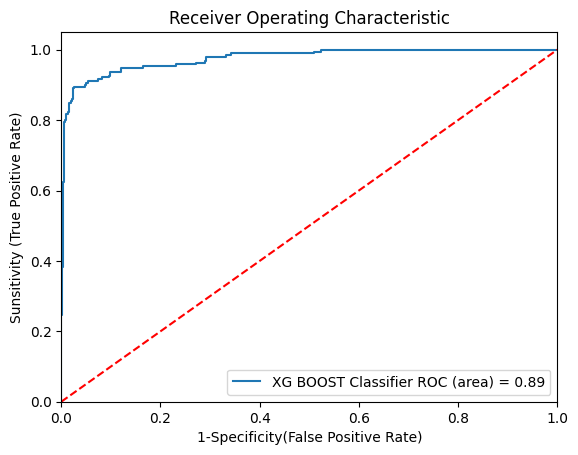

In [17]:
### Plot ROC AUC Curve

from sklearn.metrics import roc_auc_score, roc_curve

plt.figure()

## Add models to the list that you want to view on the ROC plot 

auc_model = [
    {
        'label':'XG BOOST Classifier',
        'model': XGBClassifier(n_estimators=300,learning_rate=0.1,max_depth=8,colsample_bytree=0.8),
        'score':0.8921
    }
]

## Create a loop through all models
for algo in auc_model:
    model = algo['model']
    model.fit(X_train,y_train)

    ## Compute false positive rate, true positive rate
    fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(X_test)[:,1])

    ## Calculate Area under curve to display on the plot
    plt.plot(fpr,tpr,label='%s ROC (area) = %0.2f' % (algo['label'],algo['score']))
    ## Custom setting for plot
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("1-Specificity(False Positive Rate)")
    plt.ylabel("Sunsitivity (True Positive Rate)")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.savefig("auc.png")
    plt.show()